In [1]:
import omicverse as ov
ov.utils.ov_plot_set()
from matplotlib import rcParams

# 设置全局字体为Arial
rcParams['font.family'] = 'Arial'


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.9, Tutorials: https://omicverse.readthedocs.io/


In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
adata=sc.read('../LTNN/data/Pancreas-ltnn.h5ad',compression='gzip')
adata

AnnData object with n_obs × n_vars = 2773 × 3000
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'p_time', 'p_time_r', 'p_latent_time', 'dpt_pseudotime', 'dpt_pseudotime_p', 'p_ANN_time', 'LTNN_time', 'LTNN_time_r', 'mao', 'mao_name'
    var: 'highly_variable_genes', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'T_fwd_params', 'clusters_coarse_colors', 'clusters_colors', 'clusters_sizes', 'day_colors', 'diffmap_evals', 'hvg', 'iroot', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'paga_graph', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap'
    obsm: 'T_fwd_mde', 'X_diffmap', 'X_lsi', 'X_mde', 'X_pca', 'X_umap', 'scaled|original|X_pca'

In [26]:
adata.uns['log1p']['base']=None

## panlantir

In [27]:
Traj=ov.single.TrajInfer(adata,basis='X_umap',groupby='clusters',
                         use_rep='scaled|original|X_pca',n_comps=50)
Traj.set_origin_cells('Ngn3 low EP')
Traj.set_terminal_cells(["Beta","Alpha","Delta","Epsilon"])

In [28]:
Traj.inference(method='palantir',num_waypoints=500)
adata

Time for shortest paths: 0.17621322870254516 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9997
Correlation at iteration 2: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


AnnData object with n_obs × n_vars = 2773 × 3000
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'p_time', 'p_time_r', 'p_latent_time', 'dpt_pseudotime', 'dpt_pseudotime_p', 'p_ANN_time', 'LTNN_time', 'LTNN_time_r', 'mao', 'mao_name', 'palantir_pseudotime', 'palantir_entropy'
    var: 'highly_variable_genes', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'T_fwd_params', 'clusters_coarse_colors', 'clusters_colors', 'clusters_sizes', 'day_colors', 'diffmap_evals', 'hvg', 'iroot', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'paga_graph', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap', 'DM_EigenValues', 'rank_genes_groups', 'clusters_cos

## scvelo

In [32]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [56]:
scv.tl.recover_dynamics(adata,n_jobs=8)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

recovering dynamics (using 8/12 cores)


  0%|          | 0/909 [00:00<?, ?gene/s]

Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0


    finished (0:01:02) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


  0%|          | 0/2773 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [57]:
scv.tl.latent_time(adata)
adata.obs['latent_time_scvelo']=adata.obs['latent_time'].copy()

computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


In [58]:
adata.obs['velocity_pseudotime_scvelo']=adata.obs['velocity_pseudotime'].copy()

## VeloVI

In [39]:
from tqdm import tqdm
from multiprocessing import Lock
tqdm.set_lock(Lock())  # manually set internal lock

tqdm.write("test")

test


In [43]:
#adata = preprocess_data(adata)
VELOVI.setup_anndata(adata, spliced_layer="Ms", unspliced_layer="Mu")
vae = VELOVI(adata)
vae.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 334/500:  67%|██████▋   | 334/500 [00:43<00:21,  7.62it/s, loss=-2.92e+03, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: -2736.373. Signaling Trainer to stop.


In [44]:
import torch
def add_velovi_outputs_to_adata(adata, vae):
    latent_time = vae.get_latent_time(n_samples=25)
    velocities = vae.get_velocity(n_samples=25, velo_statistic="mean")

    t = latent_time
    scaling = 20 / t.max(0)

    adata.layers["velocity"] = velocities / scaling
    adata.layers["latent_time_velovi"] = latent_time

    adata.var["fit_alpha"] = vae.get_rates()["alpha"] / scaling
    adata.var["fit_beta"] = vae.get_rates()["beta"] / scaling
    adata.var["fit_gamma"] = vae.get_rates()["gamma"] / scaling
    
    adata.var["fit_t_"] = (
        torch.nn.functional.softplus(vae.module.switch_time_unconstr)
        .detach()
        .cpu()
        .numpy()
    ) * scaling
    adata.layers["fit_t"] = latent_time.values * scaling[np.newaxis, :]
    adata.var['fit_scaling'] = 1.0

add_velovi_outputs_to_adata(adata, vae)
scv.tl.velocity_graph(adata)
scv.tl.latent_time(adata)
adata.obs['latent_time_velovi']=adata.obs['latent_time'].copy()

computing velocity graph (using 1/12 cores)


  0%|          | 0/2773 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


In [55]:
adata.obs['velocity_pseudotime_velovi']=adata.obs['velocity_pseudotime'].copy()

## pvVIA

In [61]:
v0 = ov.single.pyVIA(adata=adata,adata_key='scaled|original|X_pca',
                     adata_ncomps=80, basis='X_umap',
                         clusters='clusters',knn=30,random_seed=4,)

v0.run()

2024-03-24 01:03:19.650896	Running VIA over input data of 2773 (samples) x 50 (features)
2024-03-24 01:03:19.650929	Knngraph has 30 neighbors
2024-03-24 01:03:20.768903	Finished global pruning of 30-knn graph used for clustering at level of 0.15. Kept 46.6 % of edges. 
2024-03-24 01:03:20.779166	Number of connected components used for clustergraph  is 1
2024-03-24 01:03:20.876911	Commencing community detection
2024-03-24 01:03:21.060078	Finished running Leiden algorithm. Found 55 clusters.
2024-03-24 01:03:21.060978	Merging 41 very small clusters (<10)
2024-03-24 01:03:21.061767	Finished detecting communities. Found 14 communities
2024-03-24 01:03:21.061906	Making cluster graph. Global cluster graph pruning level: 0.15
2024-03-24 01:03:21.067162	Graph has 1 connected components before pruning
2024-03-24 01:03:21.068301	Graph has 2 connected components after pruning
2024-03-24 01:03:21.069011	Graph has 1 connected components after reconnecting
2024-03-24 01:03:21.069374	0.0% links trimm

In [67]:
#you can use `v0.model.single_cell_pt_markov` to extract the pseudotime
v0.get_pseudotime(adata)
adata.obs['pt_via_noroot']=adata.obs['pt_via'].copy()

...the pseudotime of VIA added to AnnData obs named `pt_via`


In [68]:
v0 = ov.single.pyVIA(adata=adata,adata_key='scaled|original|X_pca',
                     adata_ncomps=80, basis='X_umap',
                         clusters='clusters',knn=30,random_seed=4,
                    root_user=['Ngn3 low EP'],)

v0.run()

2024-03-24 01:04:51.600454	Running VIA over input data of 2773 (samples) x 50 (features)
2024-03-24 01:04:51.600485	Knngraph has 30 neighbors
2024-03-24 01:04:52.449944	Finished global pruning of 30-knn graph used for clustering at level of 0.15. Kept 46.6 % of edges. 
2024-03-24 01:04:52.460147	Number of connected components used for clustergraph  is 1
2024-03-24 01:04:52.555015	Commencing community detection
2024-03-24 01:04:52.741761	Finished running Leiden algorithm. Found 55 clusters.
2024-03-24 01:04:52.742437	Merging 41 very small clusters (<10)
2024-03-24 01:04:52.743307	Finished detecting communities. Found 14 communities
2024-03-24 01:04:52.743449	Making cluster graph. Global cluster graph pruning level: 0.15
2024-03-24 01:04:52.748705	Graph has 1 connected components before pruning
2024-03-24 01:04:52.749776	Graph has 2 connected components after pruning
2024-03-24 01:04:52.750502	Graph has 1 connected components after reconnecting
2024-03-24 01:04:52.750865	0.0% links trimm

In [69]:
#you can use `v0.model.single_cell_pt_markov` to extract the pseudotime
v0.get_pseudotime(adata)
adata.obs['pt_via_root']=adata.obs['pt_via'].copy()

...the pseudotime of VIA added to AnnData obs named `pt_via`


## slingshot

In [110]:
from pyslingshot import Slingshot

In [119]:
slingshot = Slingshot(adata, 
                      celltype_key="clusters", 
                      obsm_key="X_umap", 
                      start_node=5, 
                      debug_level='verbose')

Lineages: [Lineage[5, 4, 6, 2], Lineage[5, 4, 6, 1, 0, 3]]


  0%|          | 0/1 [00:00<?, ?it/s]

Reversing from leaf to root
Averaging branch @6 with lineages: [0, 1] [<pcurvepy2.pcurve.PrincipalCurve object at 0x7f68b4af3e80>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7f68b4af3dc0>]
Shrinking branch @6 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x7f68b4af3e80>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7f68b4af3dc0>]


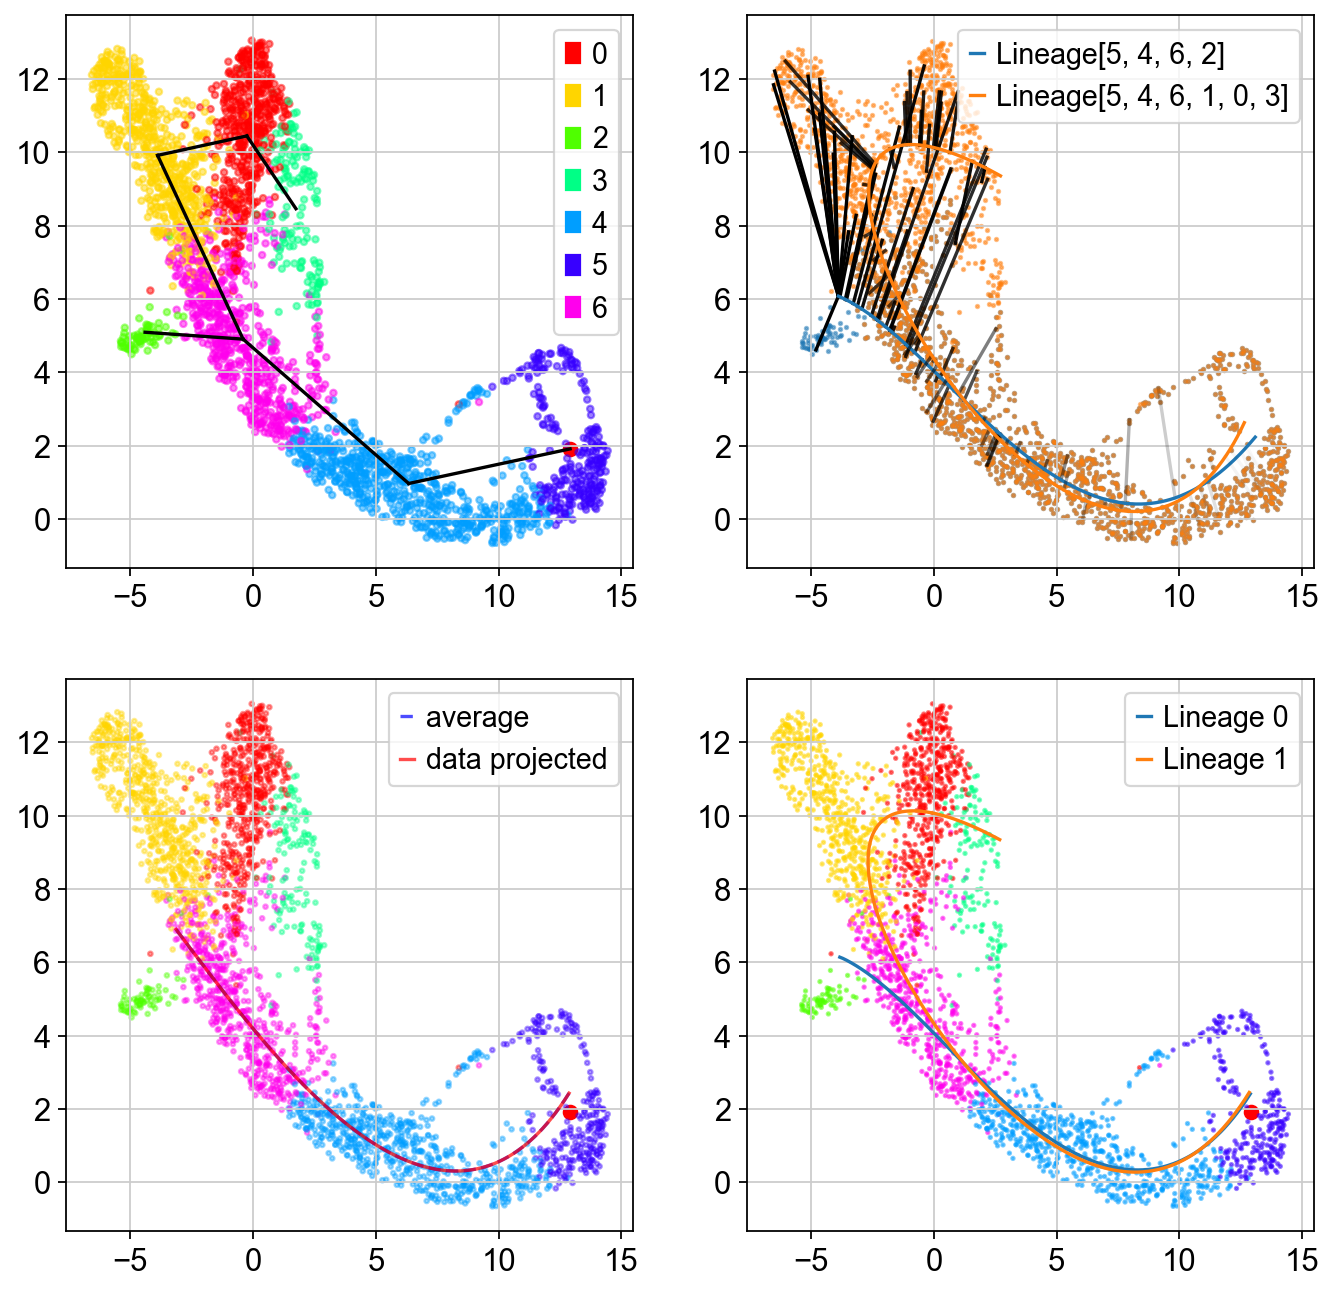

In [120]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
slingshot.fit(num_epochs=1, debug_axes=axes)

In [121]:
pseudotime = slingshot.unified_pseudotime

In [123]:
adata.obs['slingshot_time']=pseudotime

## evaluation

In [6]:
adata=sc.read('data/mouse_time.h5ad')
adata

AnnData object with n_obs × n_vars = 2773 × 909
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'p_time', 'p_time_r', 'p_latent_time', 'dpt_pseudotime', 'dpt_pseudotime_p', 'p_ANN_time', 'LTNN_time', 'LTNN_time_r', 'mao', 'mao_name', 'palantir_pseudotime', 'palantir_entropy', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'latent_time_scvelo', 'latent_time_velovi', 'velocity_pseudotime_velovi', 'velocity_pseudotime_scvelo', 'pt_via', 'pt_via_noroot', 'pt_via_root', 'slingshot_time'
    var: 'highly_variable_genes', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_

In [7]:
adata1=sc.read('../LTNN/data/Pancreas-ltnn.h5ad',compression='gzip')
adata1

AnnData object with n_obs × n_vars = 2773 × 3000
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'p_time', 'p_time_r', 'p_latent_time', 'dpt_pseudotime', 'dpt_pseudotime_p', 'p_ANN_time', 'LTNN_time', 'LTNN_time_r', 'mao', 'mao_name'
    var: 'highly_variable_genes', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'T_fwd_params', 'clusters_coarse_colors', 'clusters_colors', 'clusters_sizes', 'day_colors', 'diffmap_evals', 'hvg', 'iroot', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'paga_graph', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap'
    obsm: 'T_fwd_mde', 'X_diffmap', 'X_lsi', 'X_mde', 'X_pca', 'X_umap', 'scaled|original|X_pca'

In [8]:
adata1.obs=adata.obs.copy()

In [8]:
import scvelo as scv
scv.tl.paga(adata1, groups='clusters',vkey='paga',use_time_prior='slingshot_time')

Global seed set to 0


running PAGA using priors: ['slingshot_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


In [9]:
trans_pd=pd.DataFrame(adata1.uns['paga']['transitions_confidence'].toarray(),
            index=adata1.obs['clusters'].cat.categories,
            columns=adata1.obs['clusters'].cat.categories,).T
trans_pd

,Ngn3 low EP,Ngn3 high EP,Pre-endocrine,Beta,Alpha,Delta,Epsilon
Ngn3 low EP,0.0,0.040638,0.000000,0.000000,0.000000,0.000000,0.000000
Ngn3 high EP,0.0,0.000000,0.048554,0.000000,0.000000,0.000000,0.000000
Pre-endocrine,0.0,0.000000,0.000000,0.069103,0.000000,0.018339,0.000000
Beta,0.0,0.000000,0.000000,0.000000,0.056362,0.000000,0.000000
Alpha,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.085288
Delta,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Epsilon,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
stage1=trans_pd.loc['Ngn3 low EP','Ngn3 high EP']
stage2=trans_pd.loc['Ngn3 high EP','Pre-endocrine']
stage3=trans_pd.loc['Pre-endocrine','Beta']
stage4=trans_pd.loc['Pre-endocrine','Alpha']
stage5=trans_pd.loc['Pre-endocrine','Delta']
stage6=trans_pd.loc['Pre-endocrine','Epsilon']

0.0368991564973869

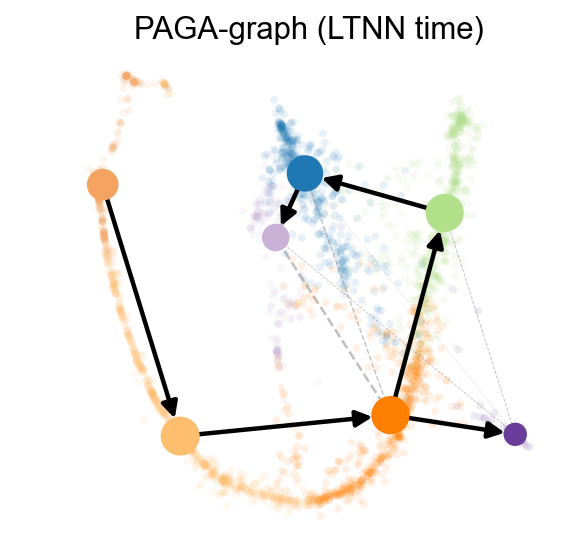

In [10]:
import scvelo as scv
ax=scv.pl.paga(adata1, basis='mde', size=50, alpha=.1,title='PAGA-graph (LTNN_time)',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)

<AxesSubplot: title={'center': 'slingshot_time'}, xlabel='X_mde1', ylabel='X_mde2'>

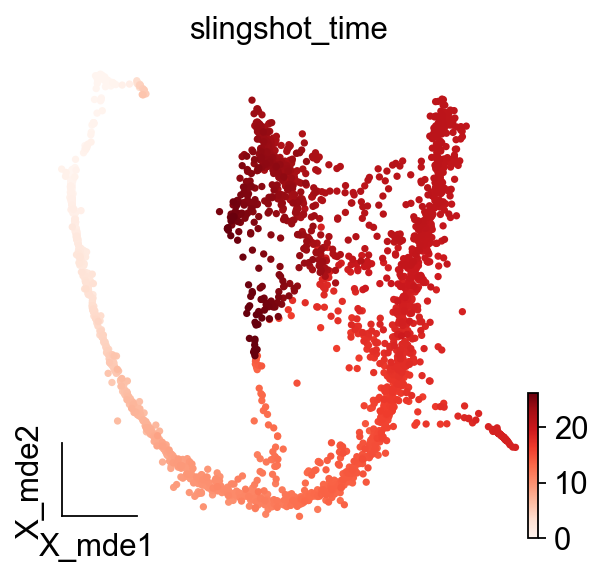

In [11]:
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(adata1,basis='X_mde', color=['slingshot_time'], 
               cmap='Reds',legend_loc='right margin',frameon='small',
                   ncols=2,wspace=0.4,show=False,ax=ax)

In [12]:
# 参数:
#   - adata:
#   - termination_ratio: 终末细胞比例，默认为 0.05。
#   - celltype_label: 表示细胞类型的标签。
#   - ground_truth_celttype: 真实细胞类型的列表。
#   - pseudotime: 表示伪时间值的标签。
# 返回:
#   - accuracy: 分类的准确性。

def accuracy_function(
    adata,
    termination_ratio=0.05,
    celltype_label='',
    ground_truth_celttype=[],
    pseudotime='',
):
    adata_obs = adata.obs
    # 根据给定的终末细胞比例计算终止百分位数
    percentile = adata_obs[pseudotime].quantile(1 - termination_ratio)
    # 选择具有伪时间值大于或等于计算百分位数的细胞
    adata_obs = adata_obs[adata_obs[pseudotime] >= percentile]
    # 根据真实细胞类型计算准确性
    accuracy = len(adata_obs.loc[adata_obs[celltype_label].isin(ground_truth_celttype), :]) / len(adata_obs)
    
    return accuracy

In [13]:
acc_dict={}
for method in ['pt_via_noroot','pt_via_root','slingshot_time',
              'velocity_pseudotime_velovi','velocity_pseudotime_scvelo',
               'latent_time_velovi','latent_time_scvelo',
              'palantir_pseudotime','dpt_pseudotime','LTNN_time']:
    acc=accuracy_function(adata1,celltype_label='clusters',
                          termination_ratio=0.05,
                     ground_truth_celttype=['Alpha','Beta','Delta','Epsilon'],
                     pseudotime=method)
    acc_dict[method]=acc
    print(method,acc)

pt_via_noroot 0.0047169811320754715
pt_via_root 1.0
slingshot_time 0.9424460431654677
velocity_pseudotime_velovi 1.0
velocity_pseudotime_scvelo 1.0
latent_time_velovi 1.0
latent_time_scvelo 1.0
palantir_pseudotime 0.9856115107913669
dpt_pseudotime 1.0
LTNN_time 0.9712230215827338


In [14]:
trans_dict={}
for method in ['pt_via_noroot','pt_via_root','slingshot_time',
              'velocity_pseudotime_velovi','velocity_pseudotime_scvelo',
               'latent_time_velovi','latent_time_scvelo',
              'palantir_pseudotime','dpt_pseudotime','LTNN_time']:
    scv.tl.paga(adata1, groups='clusters',vkey='paga',use_time_prior=method)
    trans_pd=pd.DataFrame(adata1.uns['paga']['transitions_confidence'].toarray(),
                index=adata1.obs['clusters'].cat.categories,
                columns=adata1.obs['clusters'].cat.categories,).T
    #s_li=[]
    stage1=trans_pd.loc['Ngn3 low EP','Ngn3 high EP']
    stage2=trans_pd.loc['Ngn3 high EP','Pre-endocrine']
    stage3=trans_pd.loc['Pre-endocrine','Beta']
    stage4=trans_pd.loc['Pre-endocrine','Alpha']
    stage5=trans_pd.loc['Pre-endocrine','Delta']
    stage6=trans_pd.loc['Pre-endocrine','Epsilon']
    s_li=[stage1,stage2,stage3,stage4,stage5,stage6]
    trans_dict[method]=s_li

running PAGA using priors: ['pt_via_noroot']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
running PAGA using priors: ['pt_via_root']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
running PAGA using priors: ['slingshot_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
running PAGA using priors: ['velocity_pseudotime_velovi']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/conne

In [15]:
#trans_dict={}
trans_zero={}
for method in ['pt_via_noroot','pt_via_root','slingshot_time',
              'velocity_pseudotime_velovi','velocity_pseudotime_scvelo',
               'latent_time_velovi','latent_time_scvelo',
              'palantir_pseudotime','dpt_pseudotime','LTNN_time']:
    print(method,np.mean(trans_dict[method]))
    ar=np.array(trans_dict[method])
    print(method,1-len(ar[ar==0])/len(ar))
    trans_zero[method]=1-len(ar[ar==0])/len(ar)

pt_via_noroot 0.0023470161216215244
pt_via_noroot 0.16666666666666663
pt_via_root 0.017886136131740452
pt_via_root 0.6666666666666667
slingshot_time 0.029439160323530163
slingshot_time 0.6666666666666667
velocity_pseudotime_velovi 0.038247722140142555
velocity_pseudotime_velovi 0.8333333333333334
velocity_pseudotime_scvelo 0.037315650476052266
velocity_pseudotime_scvelo 0.8333333333333334
latent_time_velovi 0.016890559980481862
latent_time_velovi 0.5
latent_time_scvelo 0.015388580048439177
latent_time_scvelo 0.33333333333333337
palantir_pseudotime 0.016716360341952827
palantir_pseudotime 0.5
dpt_pseudotime 0.02267915690484881
dpt_pseudotime 0.6666666666666667
LTNN_time 0.02958906216627206
LTNN_time 1.0


In [12]:
name_dict=dict(zip(['pt_via_noroot','pt_via_root','slingshot_time',
              'velocity_pseudotime_velovi','velocity_pseudotime_scvelo',
               'latent_time_velovi','latent_time_scvelo',
              'palantir_pseudotime','dpt_pseudotime','LTNN_time'],
                  ['VIA(autoroot)','VIA(manualroot)','Slingshot(manualroot)',
              'VeloVI(autoroot)','scVelo(autoroot)',
               'VeloVI:Latent(autoroot)','scVelo:Latent(autoroot)',
              'Palantir(manualroot)','DPT(manualroot)','LTNN(autoroot)']))

In [17]:
plot_data1=pd.DataFrame(columns=['values','method'])
for method in ['pt_via_root','slingshot_time','palantir_pseudotime','dpt_pseudotime',
               'pt_via_noroot',
              'velocity_pseudotime_velovi','velocity_pseudotime_scvelo',
               'latent_time_velovi','latent_time_scvelo',
              'LTNN_time']:
    plot_data_test=pd.DataFrame()
    plot_data_test['values']=np.array(trans_dict[method])
    plot_data_test['method']=name_dict[method]
    plot_data1=pd.concat([plot_data1,plot_data_test])
plot_data1.head() 

,values,method
0,0.000000,VIA(manualroot)
1,0.011895,VIA(manualroot)
2,0.047013,VIA(manualroot)
3,0.033017,VIA(manualroot)
4,0.015392,VIA(manualroot)


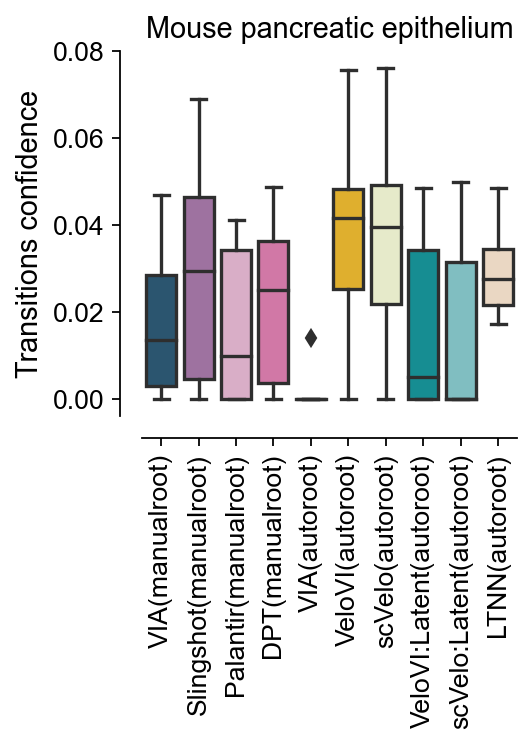

In [18]:
import seaborn as sns
fontsize=12
fig, ax = plt.subplots(figsize=(3,3))
sns.boxplot(data=plot_data1,x='method',y='values',ax=ax,
           palette=ov.pl.sc_color[11:])


ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_ylabel('Transitions confidence',fontsize=fontsize+1)
ax.set_xlabel('',fontsize=fontsize+1)

#设置横纵坐标轴字体
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.grid(False)

#不显示右边跟上边
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xticks(rotation=90)
plt.title('Mouse pancreatic epithelium',fontsize=fontsize+1)

plt.savefig("figures/fig4/box_trans_mouse.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig4/box_trans_mouse.pdf",dpi=300,bbox_inches = 'tight')

In [19]:
plot_data1=pd.DataFrame(columns=['values','method'])
for method in ['pt_via_root','slingshot_time','palantir_pseudotime','dpt_pseudotime',
               'pt_via_noroot',
              'velocity_pseudotime_velovi','velocity_pseudotime_scvelo',
               'latent_time_velovi','latent_time_scvelo',
              'LTNN_time']:
    plot_data_test=pd.DataFrame()
    plot_data_test['values']=np.array([trans_zero[method]])
    plot_data_test['method']=name_dict[method]
    plot_data1=pd.concat([plot_data1,plot_data_test])
plot_data1.head() 

,values,method
0,0.666667,VIA(manualroot)
0,0.666667,Slingshot(manualroot)
0,0.500000,Palantir(manualroot)
0,0.666667,DPT(manualroot)
0,0.166667,VIA(autoroot)


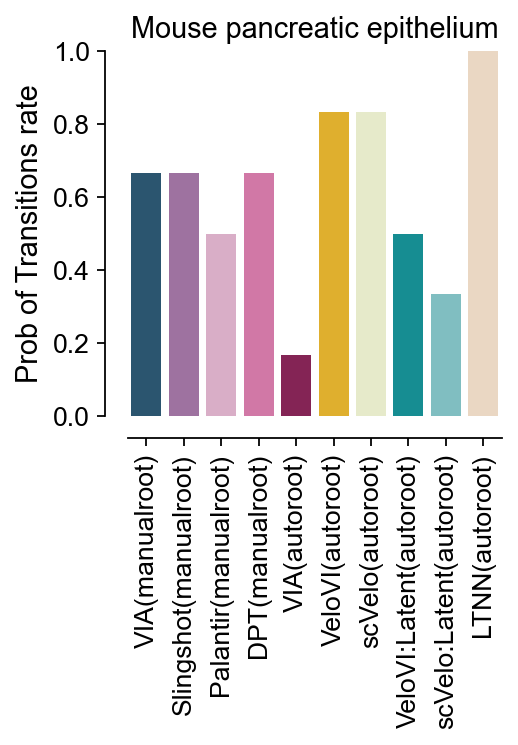

In [20]:
import seaborn as sns
fontsize=12
fig, ax = plt.subplots(figsize=(3,3))
sns.barplot(data=plot_data1,x='method',y='values',ax=ax,
           palette=ov.pl.sc_color[11:])


ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_ylabel('Prob of Transitions rate',fontsize=fontsize+1)
ax.set_xlabel('',fontsize=fontsize+1)

#设置横纵坐标轴字体
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.grid(False)
plt.ylim(0,1)

#不显示右边跟上边
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xticks(rotation=90)
plt.title('Mouse pancreatic epithelium',fontsize=fontsize+1)

plt.savefig("figures/fig4/bar_rate_mouse.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig4/bar_rate_mouse.pdf",dpi=300,bbox_inches = 'tight')

In [21]:
plot_data1=pd.DataFrame(columns=['values','method'])
for method in ['pt_via_root','slingshot_time','palantir_pseudotime','dpt_pseudotime',
               'pt_via_noroot',
              'velocity_pseudotime_velovi','velocity_pseudotime_scvelo',
               'latent_time_velovi','latent_time_scvelo',
              'LTNN_time']:
    plot_data_test=pd.DataFrame()
    plot_data_test['values']=np.array([acc_dict[method]])
    plot_data_test['method']=name_dict[method]
    plot_data1=pd.concat([plot_data1,plot_data_test])
plot_data1.head() 

,values,method
0,1.000000,VIA(manualroot)
0,0.942446,Slingshot(manualroot)
0,0.985612,Palantir(manualroot)
0,1.000000,DPT(manualroot)
0,0.004717,VIA(autoroot)


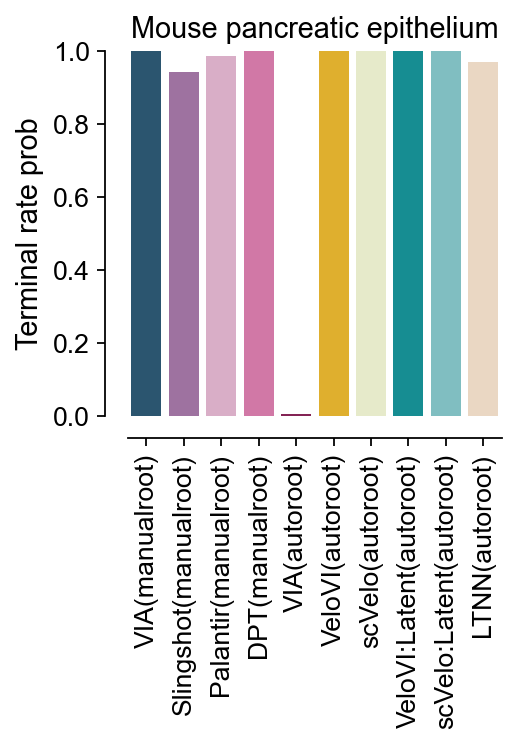

In [22]:
import seaborn as sns
fontsize=12
fig, ax = plt.subplots(figsize=(3,3))
sns.barplot(data=plot_data1,x='method',y='values',ax=ax,
           palette=ov.pl.sc_color[11:])


ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_ylabel('Terminal rate prob',fontsize=fontsize+1)
ax.set_xlabel('',fontsize=fontsize+1)

#设置横纵坐标轴字体
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.grid(False)
plt.ylim(0,1)

#不显示右边跟上边
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xticks(rotation=90)
plt.title('Mouse pancreatic epithelium',fontsize=fontsize+1)

plt.savefig("figures/fig4/bar_terminal_mouse.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig4/bar_terminal_mouse.pdf",dpi=300,bbox_inches = 'tight')

## Nbt metric

In [3]:
adata=sc.read('data/mouse_time.h5ad',compression='gzip')
adata

AnnData object with n_obs × n_vars = 2773 × 909
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'p_time', 'p_time_r', 'p_latent_time', 'dpt_pseudotime', 'dpt_pseudotime_p', 'p_ANN_time', 'LTNN_time', 'LTNN_time_r', 'mao', 'mao_name', 'palantir_pseudotime', 'palantir_entropy', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'latent_time_scvelo', 'latent_time_velovi', 'velocity_pseudotime_velovi', 'velocity_pseudotime_scvelo', 'pt_via', 'pt_via_noroot', 'pt_via_root', 'slingshot_time'
    var: 'highly_variable_genes', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_

In [9]:
import scvelo as scv
scv.tl.paga(adata1, groups='clusters',vkey='paga',use_time_prior='LTNN_time')

running PAGA using priors: ['LTNN_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


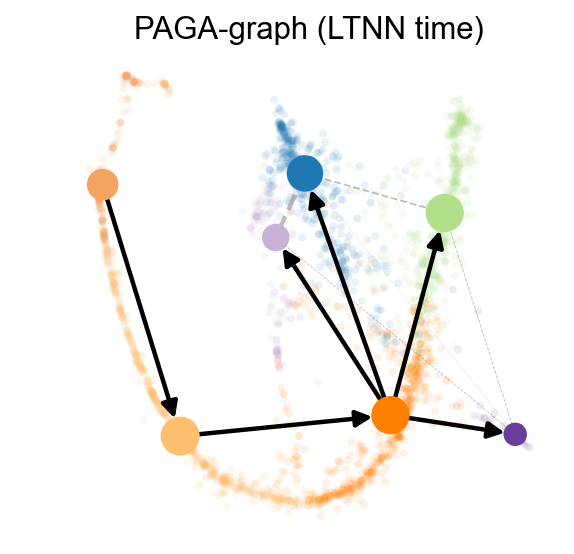

In [10]:
import scvelo as scv
ax=scv.pl.paga(adata1, basis='mde', size=50, alpha=.1,title='PAGA-graph (LTNN_time)',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)

running PAGA using priors: ['pt_via_root']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
running PAGA using priors: ['slingshot_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
running PAGA using priors: ['palantir_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
running PAGA using priors: ['dpt_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivit

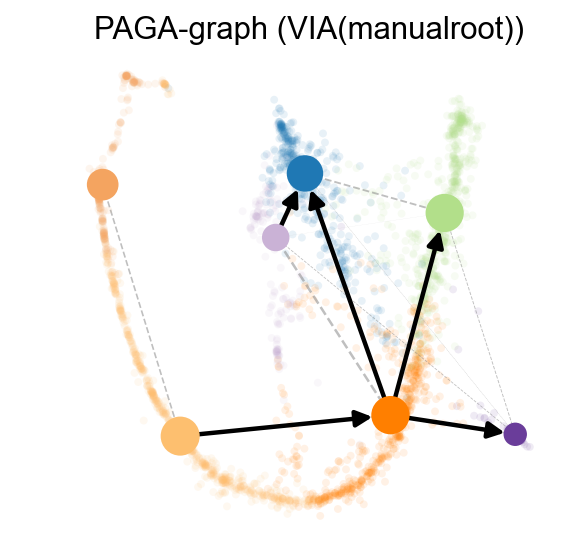

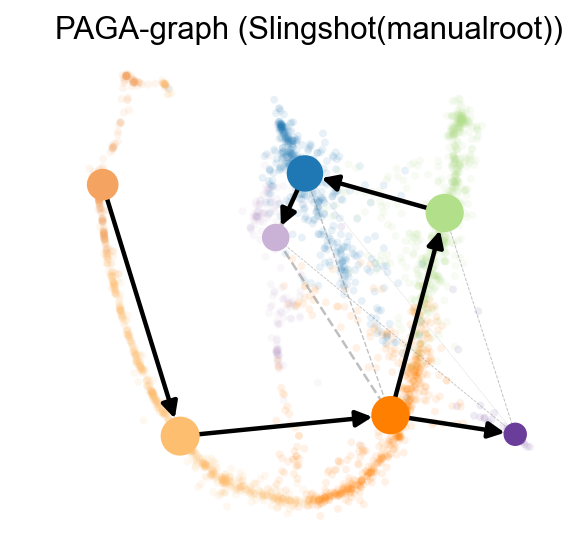

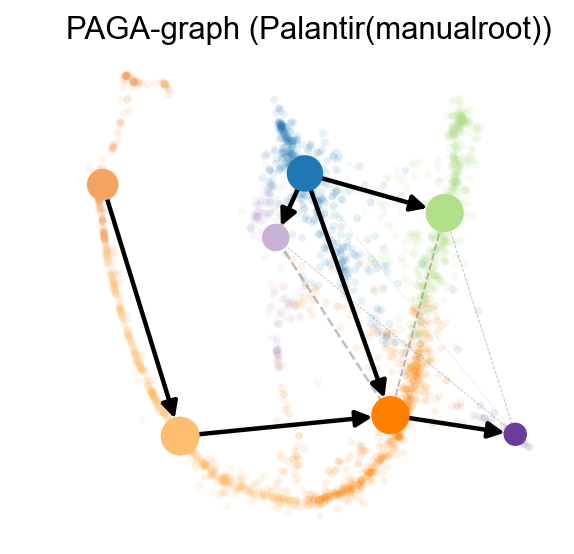

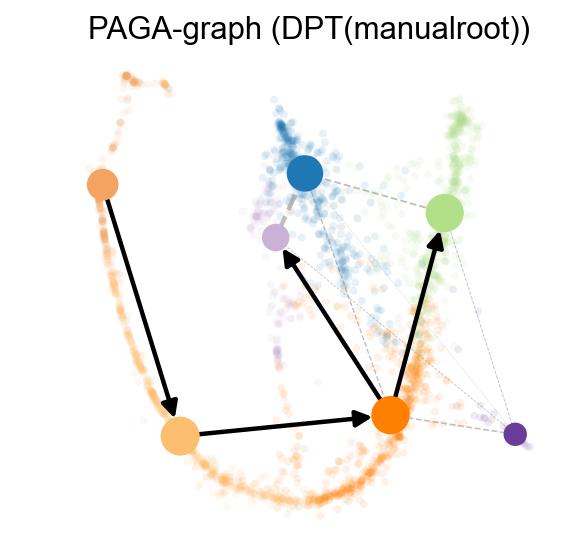

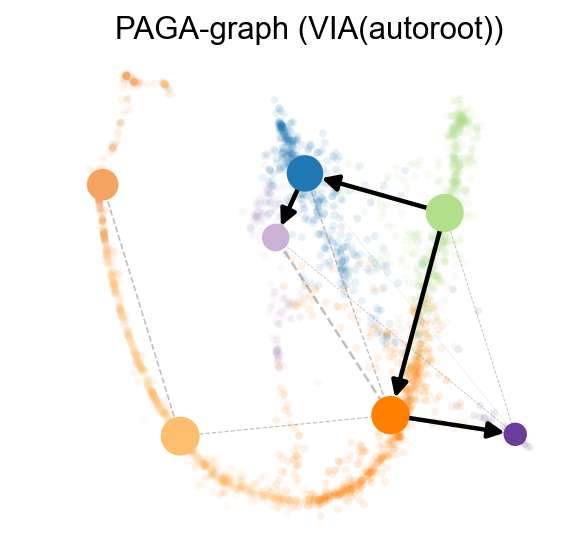

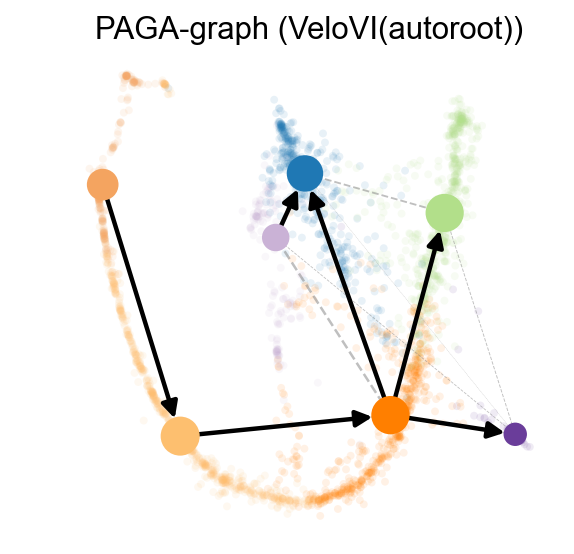

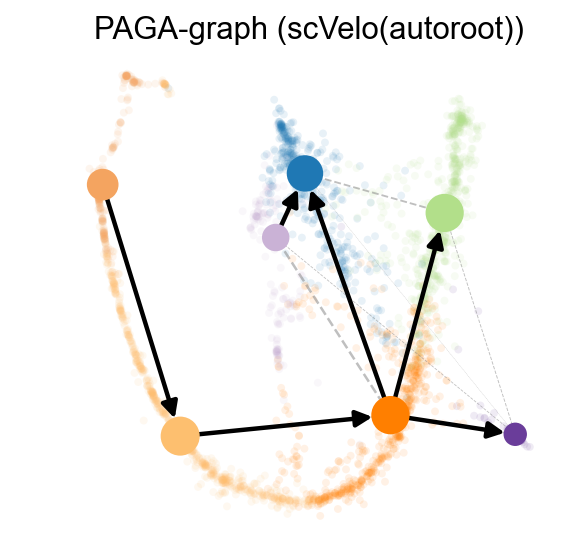

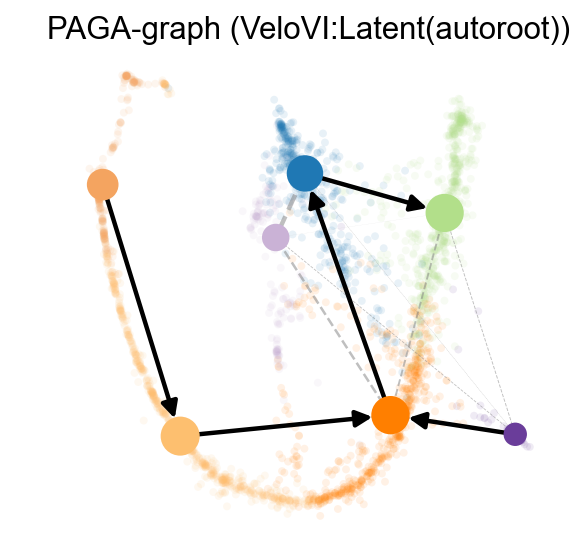

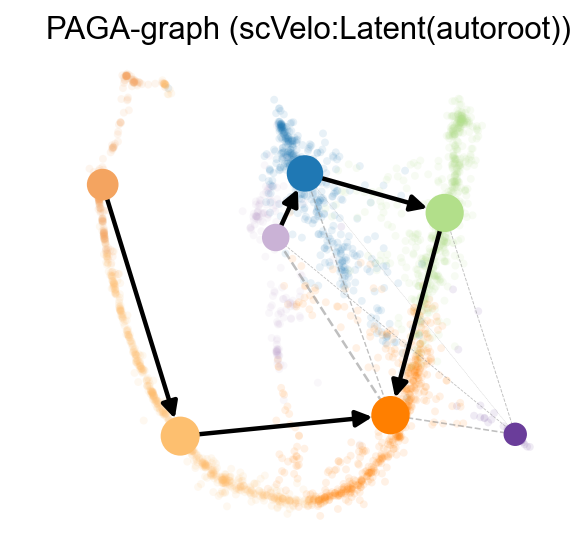

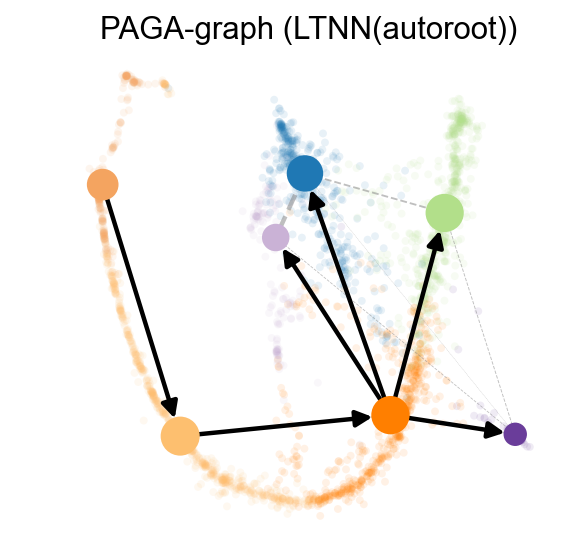

In [13]:
for method in ['pt_via_root','slingshot_time','palantir_pseudotime','dpt_pseudotime',
               'pt_via_noroot',
              'velocity_pseudotime_velovi','velocity_pseudotime_scvelo',
               'latent_time_velovi','latent_time_scvelo',
              'LTNN_time']:
    scv.tl.paga(adata1, groups='clusters',vkey='paga',use_time_prior=method)
    ax=scv.pl.paga(adata1, basis='mde', size=50, alpha=.1,title=f'PAGA-graph ({name_dict[method]})',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
    plt.savefig(f"figures/fig4/m_PAGA-graph ({name_dict[method]}).png",dpi=300,bbox_inches = 'tight')
    plt.savefig(f"pdf/fig4/m_PAGA-graph ({name_dict[method]}).pdf",dpi=300,bbox_inches = 'tight')